In [1]:
import os
os.chdir(r"C:\Users\romak\Desktop\Urban_Technology_Berlin_Mitte")
os.getcwd()


'C:\\Users\\romak\\Desktop\\Urban_Technology_Berlin_Mitte'

In [2]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.affinity import translate


In [3]:
buildings = gpd.read_file("data/processed/buildings_with_height.geojson")
mitte = gpd.read_file("maps/mitte.geojson").to_crs(epsg=25833)


In [4]:
buildings.shape


(20527, 25)

In [5]:
sun_altitude = 14.0977   # degrees
sun_azimuth = 178.9258  # degrees


In [6]:
#VERY IMPORTANT: SHADOW DIRECTION (READ THIS)

#Sun azimuth = direction sun is coming FROM

#Shadows go in the opposite direction

#So shadow direction = sun azimuth + 180°

In [7]:
shadow_length = buildings["height_m"] / np.tan(np.deg2rad(sun_altitude))

shadow_length.describe()


count    2.052700e+04
mean     5.972765e+01
std      2.842240e-14
min      5.972765e+01
25%      5.972765e+01
50%      5.972765e+01
75%      5.972765e+01
max      5.972765e+01
Name: height_m, dtype: float64

In [8]:
shadow_angle = np.deg2rad(sun_azimuth + 180)

dx = shadow_length * np.sin(shadow_angle)
dy = shadow_length * np.cos(shadow_angle)

dx.mean(), dy.mean()


(np.float64(-1.1197279139301952), np.float64(59.71715378196927))

In [9]:
shadows = buildings.copy()

shadows["geometry"] = [
    translate(geom, xoff=dx_i, yoff=dy_i)
    for geom, dx_i, dy_i in zip(buildings.geometry, dx, dy)
]


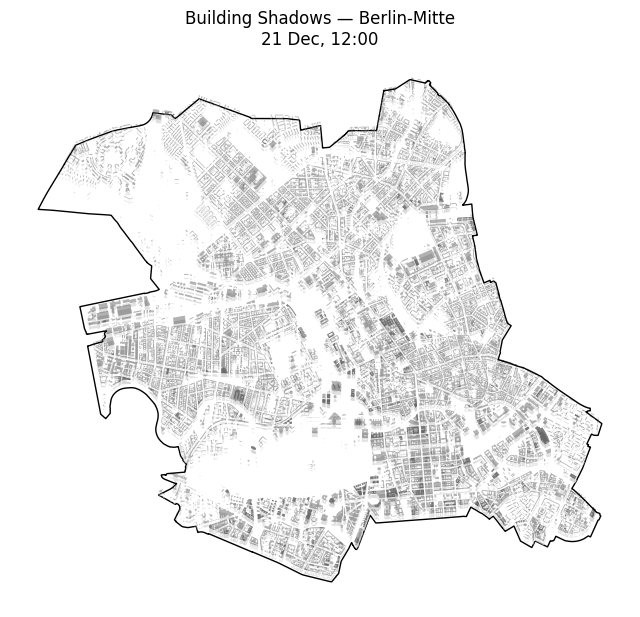

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

mitte.plot(ax=ax, edgecolor="black", facecolor="none")
buildings.plot(ax=ax, color="lightgrey", alpha=0.7)
shadows.plot(ax=ax, color="black", alpha=0.3)

ax.set_title("Building Shadows — Berlin-Mitte\n21 Dec, 12:00")
ax.axis("off")

plt.show()


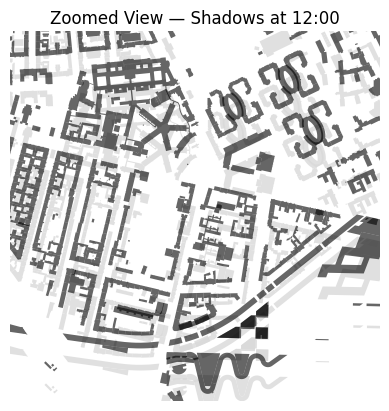

In [11]:
# Zoom to a central area (example bounding box)
ax = plt.axes()

mitte.plot(ax=ax, edgecolor="black", facecolor="none")
buildings.plot(ax=ax, color="#d9d9d9", alpha=0.8)
shadows.plot(ax=ax, color="black", alpha=0.6)

ax.set_xlim(388000, 389000)
ax.set_ylim(5820000, 5821000)

ax.set_title("Zoomed View — Shadows at 12:00")
ax.axis("off")

plt.show()


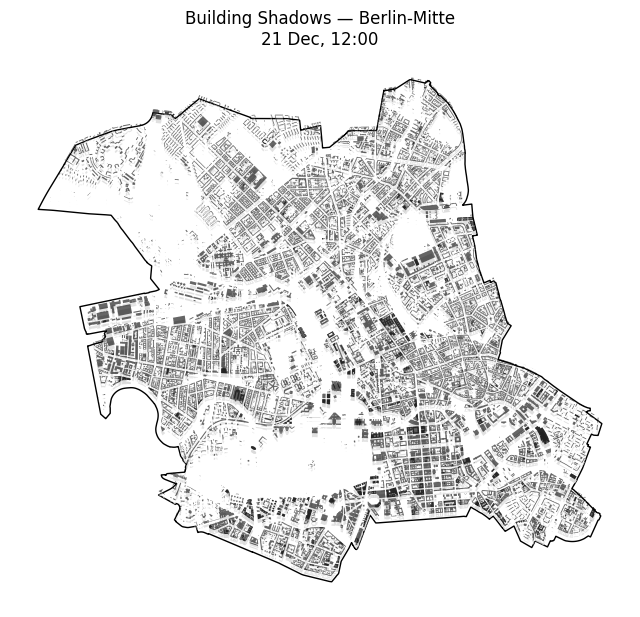

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# boundary
mitte.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)

# buildings (lighter)
buildings.plot(ax=ax, color="#d9d9d9", alpha=0.8)

# shadows (VERY dark)
shadows.plot(ax=ax, color="#000000", alpha=0.6)

ax.set_title("Building Shadows — Berlin-Mitte\n21 Dec, 12:00", fontsize=12)
ax.axis("off")

plt.show()


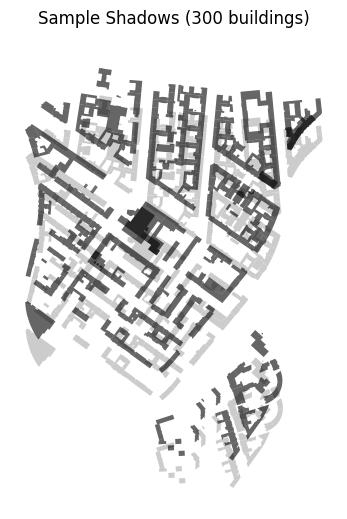

In [13]:
sample_buildings = buildings.iloc[:300]
sample_shadows = shadows.iloc[:300]

fig, ax = plt.subplots(figsize=(6, 6))

sample_buildings.plot(ax=ax, color="#cccccc")
sample_shadows.plot(ax=ax, color="black", alpha=0.6)

ax.set_title("Sample Shadows (300 buildings)")
ax.axis("off")

plt.show()
